In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Accident_Data_no_hotencode.csv')

In [ ]:
df.shape

(635704, 13)

In [ ]:
df.head()

,Accident_Severity,Latitude,Light_Conditions,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Month,Year
0,0,51.506187,Darkness,-0.209082,1,2,Dry,Single_carriageway,Urban,Fine,Car,6,2019
1,0,51.495029,Daylight,-0.173647,1,2,Wet_or_damp,Single_carriageway,Urban,Raining,Car,7,2019
2,0,51.495478,Daylight,-0.202731,1,4,Dry,Single_carriageway,Urban,Fine,Passenger_Vehicles(Minibus_or_Bus),8,2019
3,0,51.497750,Daylight,-0.192556,2,3,Dry,Single_carriageway,Urban,Fine,Car,9,2019
4,0,51.501405,Daylight,-0.161577,1,2,Dry,Dual_carriageway,Urban,Fine,Goods_Carrier,9,2019


In [ ]:
{column: len(df[column].unique()) for column in df.columns if df.dtypes[column] == 'object'}

{'Light_Conditions': 2,
 'Road_Surface_Conditions': 3,
 'Road_Type': 4,
 'Urban_or_Rural_Area': 2,
 'Weather_Conditions': 3,
 'Vehicle_Type': 5}

In [ ]:
from sklearn.preprocessing import LabelEncoder

#perform label encoding on col1, col2 columns
df[['Light_Conditions',
 'Road_Surface_Conditions',
 'Road_Type',
 'Urban_or_Rural_Area',
 'Weather_Conditions',
 'Vehicle_Type']] = df[['Light_Conditions',
 'Road_Surface_Conditions',
 'Road_Type',
 'Urban_or_Rural_Area',
 'Weather_Conditions',
 'Vehicle_Type']].apply(LabelEncoder().fit_transform)

In [ ]:
df.head()

,Accident_Severity,Latitude,Light_Conditions,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Month,Year
0,0,51.506187,0,-0.209082,1,2,0,3,1,0,1,6,2019
1,0,51.495029,1,-0.173647,1,2,2,3,1,1,1,7,2019
2,0,51.495478,1,-0.202731,1,4,0,3,1,0,4,8,2019
3,0,51.497750,1,-0.192556,2,3,0,3,1,0,1,9,2019
4,0,51.501405,1,-0.161577,1,2,0,0,1,0,2,9,2019


Test/Train Split

In [ ]:
target = 'Accident_Severity'

In [ ]:
y = df[target].copy()
X = df.drop(columns=[target]).copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Accident_Severity
1    541326
0     94378
Name: count, dtype: int64


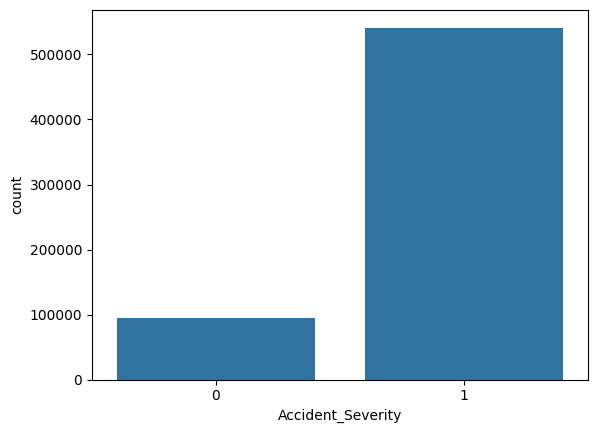

In [ ]:
ax = sns.countplot(x=target, data=df)
print(df[target].value_counts())

**XGBoost algorithm apply without Sampling**

In [ ]:
from xgboost import XGBClassifier

# Create an instance of the XGBClassifier
model = XGBClassifier(objective='binary:logistic', enable_categorical=True)

# Fit the model to the training data
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Make class predictions
y_pred = model.predict(X_test)

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)

# Calculate accuracy
accuracy = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.19%


In [ ]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.01      0.03     28237
           1       0.85      1.00      0.92    162475

    accuracy                           0.85    190712
   macro avg       0.67      0.51      0.47    190712
weighted avg       0.80      0.85      0.79    190712



Hyper parameter tuning using GridSearchCV

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.7}
Best score:  0.8516265461664656


In [ ]:
# Create an instance of the XGBClassifier
model_optimized = XGBClassifier(objective='binary:logistic', enable_categorical=True, learning_rate= 0.1, max_depth= 3, subsample=0.7)

# Fit the model to the training data
model_optimized.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
accuracy = model_optimized.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.21%


In [ ]:
# Make class predictions
y_pred_opt = model_optimized.predict(X_test)

# Predict probabilities
y_pred_proba_opt = model_optimized.predict_proba(X_test)

# Calculate accuracy
accuracy_opt = model_optimized.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy_opt * 100.0))

print(classification_report(y_test, y_pred_opt))

Accuracy: 85.21%
              precision    recall  f1-score   support

           0       0.57      0.01      0.01     28237
           1       0.85      1.00      0.92    162475

    accuracy                           0.85    190712
   macro avg       0.71      0.50      0.47    190712
weighted avg       0.81      0.85      0.79    190712



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_pred_opt)
print(cm)

[[   146  28091]
 [   112 162363]]


**XGBoost Classifier using Sampling.**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

under = RandomUnderSampler(sampling_strategy=0.5)
X_train, y_train= under.fit_resample(X_train, y_train)

In [ ]:
over = RandomOverSampler(sampling_strategy=0.8)
X_train, y_train= over.fit_resample(X_train, y_train)

In [ ]:
unique, count = np.unique(y_train, return_counts=True)
y_train_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_value_count

{0: 105825, 1: 132282}

In [ ]:
from xgboost import XGBClassifier

# Create an instance of the XGBClassifier
model = XGBClassifier(objective='binary:logistic', enable_categorical=True)

# Fit the model to the training data
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Make class predictions
y_pred = model.predict(X_test)

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)

# Calculate accuracy
accuracy = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 70.11%


In [ ]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.24      0.48      0.32     28237
           1       0.89      0.74      0.81    162475

    accuracy                           0.70    190712
   macro avg       0.57      0.61      0.57    190712
weighted avg       0.80      0.70      0.74    190712



Hyper parameter tuning using GridSearchCV

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 7, 'subsample': 1}
Best score:  0.6374151327680156


In [ ]:
# Create an instance of the XGBClassifier
model_optimized = XGBClassifier(objective='binary:logistic', enable_categorical=True, learning_rate= 0.1, max_depth= 7, subsample=1)

# Fit the model to the training data
model_optimized.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
accuracy = model_optimized.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 69.68%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_pred_opt)
print(cm)

[[ 13903  14334]
 [ 43484 118991]]


In [ ]:
# Make class predictions
y_pred_opt = model_optimized.predict(X_test)

# Predict probabilities
y_pred_proba_opt = model_optimized.predict_proba(X_test)

# Calculate accuracy
accuracy_opt = model_optimized.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy_opt * 100.0))

print(classification_report(y_test, y_pred_opt))

Accuracy: 69.68%
              precision    recall  f1-score   support

           0       0.24      0.49      0.32     28237
           1       0.89      0.73      0.80    162475

    accuracy                           0.70    190712
   macro avg       0.57      0.61      0.56    190712
weighted avg       0.80      0.70      0.73    190712

